In [1]:
#Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
#Read Dataset
df = pd.read_csv('datasets/weight-height.csv')

In [3]:
#Spill data:)
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
#Lihat jenis data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


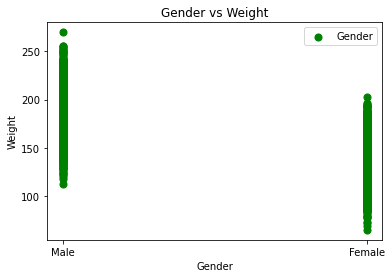

In [5]:
#Plot gender vs weight
x1 = df.iloc[:, 0].values
y1 = df.iloc[:, 2].values
plt.scatter(x1,y1,label='Gender',color='Green',s=50)
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.title('Gender vs Weight')
plt.legend()
plt.show()

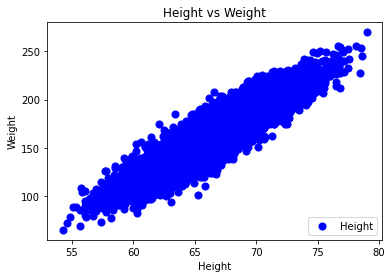

In [6]:
#Plot height vs weight
x2 = df.iloc[:, 1].values
y2 = df.iloc[:, 2].values
plt.scatter(x2,y2,label='Height',color='blue',s=50)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.legend(loc="lower right")
plt.show()

In [7]:
#memisahkan nilai dependen dan independen....
#X-variabel independen
X = df.iloc[:, 1:2].values
print(X)

[[73.84701702]
 [68.78190405]
 [74.11010539]
 ...
 [63.86799221]
 [69.03424313]
 [61.94424588]]


In [8]:
#X-variabel independen
y = df.iloc[:, 2].values
print(y)

[241.89356318 162.31047252 212.74085556 ... 128.47531878 163.85246135
 113.64910268]


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [10]:
#Membuat model linear
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#Prediksi test set
y_pred = regressor.predict(X_test)

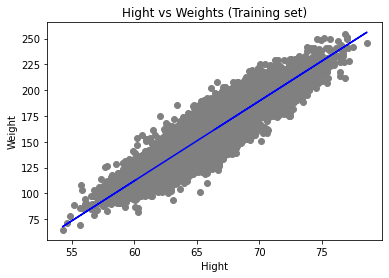

In [11]:
# Visualisasi Train Set
plt.scatter(X_train, y_train, color = 'grey')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hight vs Weights (Training set)')
plt.xlabel('Hight')
plt.ylabel('Weight')
plt.show()

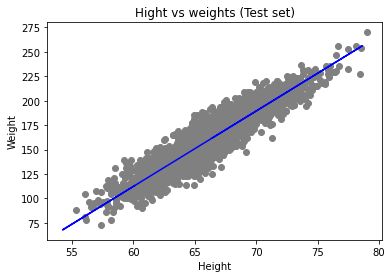

In [12]:
# Visualisasi Tes Set
plt.scatter(X_test, y_test, color = 'grey')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hight vs weights (Test set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [13]:
# Prediksi Test 
y_pred = regressor.predict(X_test)
print('Koefisien: ', regressor.coef_)
# Kuadrat Error
print("Rata-rata kuadrat error: %.2f" % np.mean((regressor.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regressor.score(X_test, y_test))

Koefisien:  [7.72896259]
Rata-rata kuadrat error: 143.23
Variance score: 0.86


In [15]:
#dump model to file pkl format
import joblib
joblib.dump(regressor, 'weight_height.pkl')

['weight_height.pkl']